### Imports

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

### Perceptron Algorithm

In [77]:
def perceptron(X, y, learning_rate_func, epochs=100):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    errors = []
    
    for epoch in range(1, epochs + 1):
        learning_rate = learning_rate_func(epoch)
        total_error = 0
        for xi, target in zip(X_bias, y):
            activation = np.dot(weights, xi)
            output = 1 if activation >= 0 else -1
            update = learning_rate * (target - output)
            weights += update * xi
            total_error += int(update != 0.0)
        errors.append(total_error)
        if total_error == 0:
            break  # Early stopping
    return weights, errors

### Learning Rate Functions

In [78]:
def constant_lr(lr):
    return lambda epoch: lr

def decreasing_lr(initial_lr):
    return lambda epoch: initial_lr / epoch  # Learning rate decreases over epochs

def exponential_decay_lr(initial_lr, decay_rate):
    return lambda epoch: initial_lr * np.exp(-decay_rate * epoch)

### Distance to Hyperplane Function

In [79]:
def distance_to_hyperplane(X, weights):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    numerator = np.abs(np.dot(X_bias, weights))
    denominator = np.linalg.norm(weights[1:])
    return numerator / denominator

# Implementing in 2D

### Generate Data

In [80]:
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [1.4, 1.4]
X_neg = np.random.randn(N, 2) + [-1.4, -1.4]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))

### Train Perceptron with Different Learning Rates and Plot Error vs. Epochs

In [81]:
learning_rate_functions = {
    'Constant LR=0.1': constant_lr(0.1),
    'Constant LR=0.01': constant_lr(0.01),
    'Decreasing LR': decreasing_lr(1.0),
    'Exponential Decay LR': exponential_decay_lr(1.0, decay_rate=0.1)
}

weights_list = []
errors_list = []
labels_list = []

for label, lr_func in learning_rate_functions.items():
    weights, errors = perceptron(X, y, learning_rate_func=lr_func, epochs=100)
    weights_list.append(weights)
    errors_list.append(errors)
    labels_list.append(label)

### Plot Error vs. Epochs:

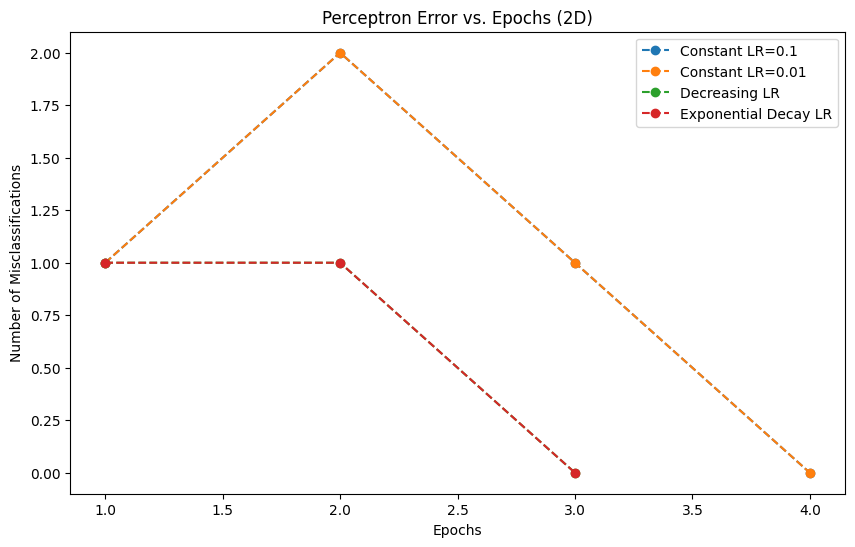

In [82]:
plt.figure(figsize=(10, 6))
for errors, label in zip(errors_list, labels_list):
  plt.plot(range(1, len(errors) + 1), errors, label=label, linestyle='--', marker='o')
  
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Error vs. Epochs (2D)')
plt.legend()
plt.show()

# Implementing in 3D

### Generate the 3D Dataset

In [85]:
np.random.seed(42)
N = 50
X_pos_3d = np.random.randn(N, 3) + [1.4, 1.4, 1.4]
X_neg_3d = np.random.randn(N, 3) + [-1.4, -1.4, -1.4]
X_3d = np.vstack((X_pos_3d, X_neg_3d))
y_3d = np.hstack((np.ones(N), -np.ones(N)))

### Train Perceptron with Different Learning Rates and Plot Error vs. Epochs

In [86]:
weights_list_3d = []
errors_list_3d = []
labels_list_3d = []

for label, lr_func in learning_rate_functions.items():
    weights, errors = perceptron(X_3d, y_3d, learning_rate_func=lr_func, epochs=100)
    weights_list_3d.append(weights)
    errors_list_3d.append(errors)
    labels_list_3d.append(label)

### Plot Hyperplanes Obtained by Perceptron with Different Learning Rates

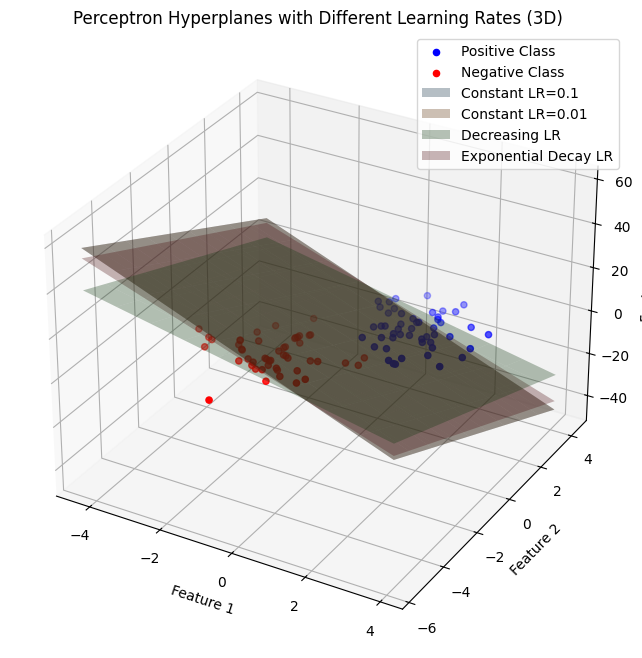

In [87]:
def plot_hyperplane_3d(weights, label):
    xx, yy = np.meshgrid(np.linspace(X_3d[:,0].min()-1, X_3d[:,0].max()+1, 10),
                         np.linspace(X_3d[:,1].min()-1, X_3d[:,1].max()+1, 10))
    zz = -(weights[1]*xx + weights[2]*yy + weights[0])/weights[3]
    ax.plot_surface(xx, yy, zz, alpha=0.3, label=label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y_3d == 1][:, 0], X_3d[y_3d == 1][:, 1], X_3d[y_3d == 1][:, 2], color='blue', label='Positive Class')
ax.scatter(X_3d[y_3d == -1][:, 0], X_3d[y_3d == -1][:, 1], X_3d[y_3d == -1][:, 2], color='red', label='Negative Class')

for weights, label in zip(weights_list_3d, labels_list_3d):
    plot_hyperplane_3d(weights, label)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Perceptron Hyperplanes with Different Learning Rates (3D)')
ax.legend()
plt.show()


## Implement Steps to Approximate the Optimal Hyperplane

### Step 2: Select Closest Points from One Class

In [88]:
k = 3  # Number of closest points to consider

# Get positive class points
X_pos_3d = X_3d[y_3d == 1]
distances_pos = distance_to_hyperplane(X_pos_3d, weights_list_3d[0])

# Find indices of the k closest points
closest_pos_indices = np.argsort(distances_pos)[:k]
closest_pos_points = X_pos_3d[closest_pos_indices]

Fit a Hyperplane to These Points

In [89]:
# Add bias term
X_pos_bias = np.hstack((np.ones((closest_pos_points.shape[0], 1)), closest_pos_points))
y_pos = np.ones(closest_pos_points.shape[0])

# Fit hyperplane (using least squares)
weights_pos, _, _, _ = np.linalg.lstsq(X_pos_bias, y_pos, rcond=None)


### Step 3: Select Closest Points from the Other Class and Create a Parallel Hyperplane

In [90]:
# Get negative class points
X_neg_3d = X_3d[y_3d == -1]
distances_neg = distance_to_hyperplane(X_neg_3d, weights_list_3d[0])

# Find indices of the k closest points
closest_neg_indices = np.argsort(distances_neg)[:k]
closest_neg_points = X_neg_3d[closest_neg_indices]

# Fit hyperplane to negative points
X_neg_bias = np.hstack((np.ones((closest_neg_points.shape[0], 1)), closest_neg_points))
y_neg = -np.ones(closest_neg_points.shape[0])

weights_neg, _, _, _ = np.linalg.lstsq(X_neg_bias, y_neg, rcond=None)


### Step 4: Compute the Midway Hyperplane

In [91]:
# Compute the midway hyperplane by averaging the weights
weights_optimal = (weights_pos + weights_neg) / 2


### Compare with the Optimal Hyperplane from SVM

In [92]:
# Fit SVM with linear kernel
clf_3d = svm.SVC(kernel='linear', C=1e5)
clf_3d.fit(X_3d, y_3d)

# Get the coefficients and intercept
w_svm_3d = clf_3d.coef_[0]
b_svm_3d = clf_3d.intercept_[0]

# SVM hyperplane weights
weights_svm_3d = np.hstack((b_svm_3d, w_svm_3d))


### Plotting All Hyperplanes Together in 3D

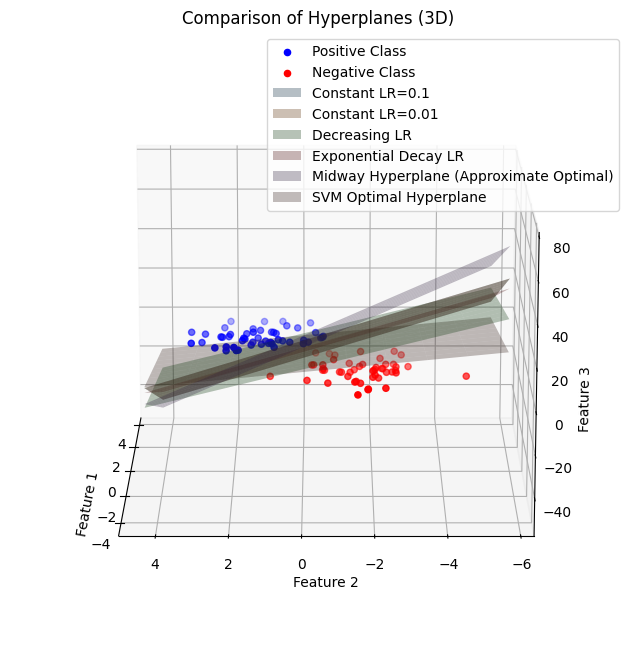

In [93]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y_3d == 1][:, 0], X_3d[y_3d == 1][:, 1], X_3d[y_3d == 1][:, 2], color='blue', label='Positive Class')
ax.scatter(X_3d[y_3d == -1][:, 0], X_3d[y_3d == -1][:, 1], X_3d[y_3d == -1][:, 2], color='red', label='Negative Class')

# Plot perceptron hyperplanes with different learning rates
for weights, label in zip(weights_list_3d, labels_list_3d):
    plot_hyperplane_3d(weights, label)

# Plot midway hyperplane (approximate optimal)
plot_hyperplane_3d(weights_optimal, 'Midway Hyperplane (Approximate Optimal)')

# Plot SVM hyperplane
plot_hyperplane_3d(weights_svm_3d, 'SVM Optimal Hyperplane')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Comparison of Hyperplanes (3D)')
ax.legend()

# Cambiar la perspectiva de la cámara: view_init(elevación, ángulo azimutal)
ax.view_init(elev=15, azim=180)  # Ajusta estos valores según prefieras

plt.show()
